In [44]:
import re
import matplotlib.pyplot as plt
import numpy as np
r1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
r2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def getSensitivityMatrix(dataset = "BME", k = 1):
    M = np.zeros((10, 10))
    with open('Results/finals/sensitivityBME copy.txt', 'r') as file:
        for line in file:
            line = line.strip()
            pattern = r"BME\((\d+)\)"
            match = re.search(pattern, line)
            number = int(match.group(1))
            if number == k:
                words = line.split("&")
                for i in range(1, len(words)):
                    pattern = r"\(([^;]+);([^)]+)\)\s+([0-9.]+)"
                    string = words[i].strip()
                    matches = re.match(pattern, string)
                    num1 = int(float(matches.group(1))*10) - 1
                    num2 = int(float(matches.group(2))*10) - 1
                    num3 = float(matches.group(3))
                    # row index is ratio, column index is sub_ratio
                    M[num1][num2] = num3
            else:
                continue
    return M
def getSensitivityExperimentResultK(ratio = True, value = 0):
    # ratio = true means the width of the diagonal line
    # ratio = false means the length of the subsequence 
    # value: the row/ column index that indicate the value of ratio (0=0.1, 1=0.2)
    if ratio == True:
        plt.figure(figsize=(6, 4))
        for k in range(1, 14, 2):
            M = getSensitivityMatrix(k=k)
            plt.plot(r1, M[value], marker='o', linestyle='-', label=f"k={k}")
        plt.title(f'Sensitivity Experiment With Ratio={(value + 1)/10}')
        plt.xlabel('Subsequence Length Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()
    if ratio == False:
        plt.figure(figsize=(6, 4))
        for i in range(1, 14, 2):
            M = getSensitivityMatrix(k=i)
            data = [row[value] for row in M]
            plt.plot(r2, data, marker='o', linestyle='-', label=f"k={i}")
        plt.title(f'Sensitivity Experiment With Sub-Ratio={(value + 1)/10}')
        plt.xlabel('Diagonal Line Width Ratio')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.legend()
        plt.show()

## 1. Sensitivity with R2

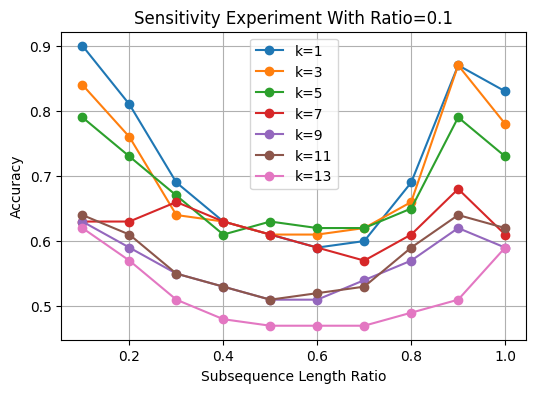

In [45]:
getSensitivityExperimentResultK(value=0)

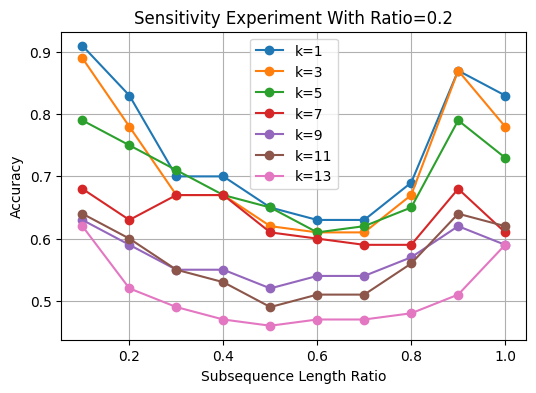

In [46]:
getSensitivityExperimentResultK(value=1)

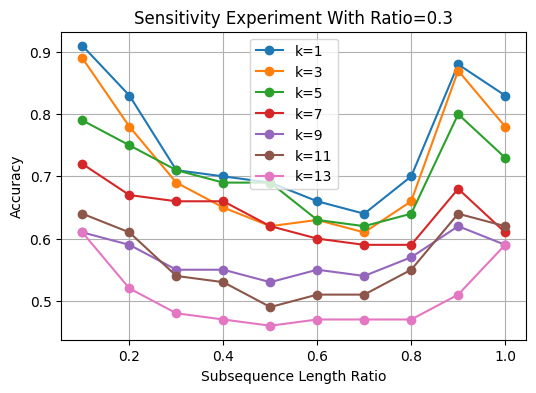

In [47]:
getSensitivityExperimentResultK(value=2)

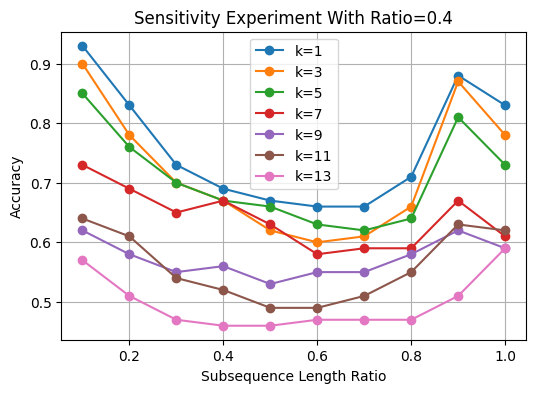

In [48]:
getSensitivityExperimentResultK(value=3)

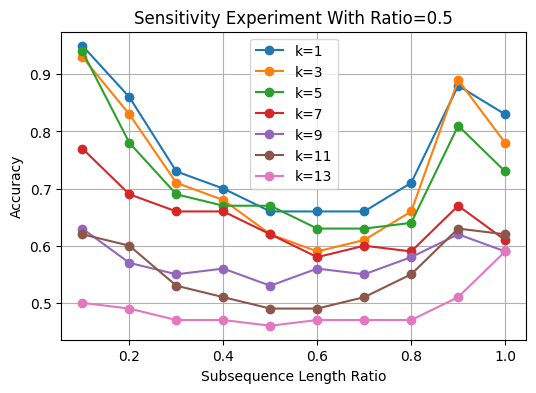

In [49]:
getSensitivityExperimentResultK(value=4)

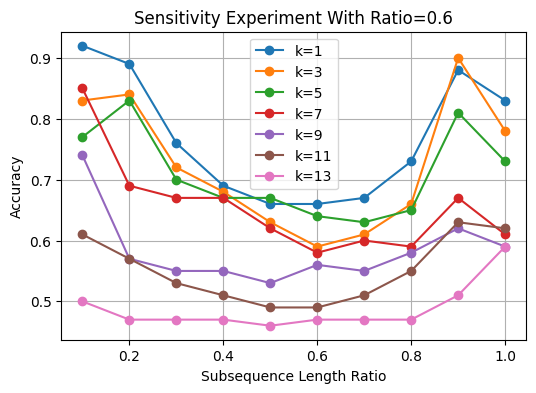

In [50]:
getSensitivityExperimentResultK(value=5)

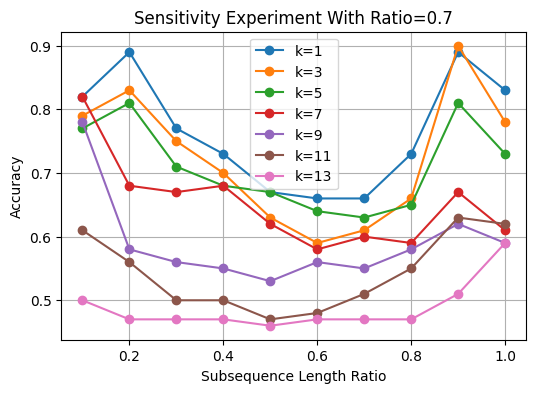

In [51]:
getSensitivityExperimentResultK(value=6)

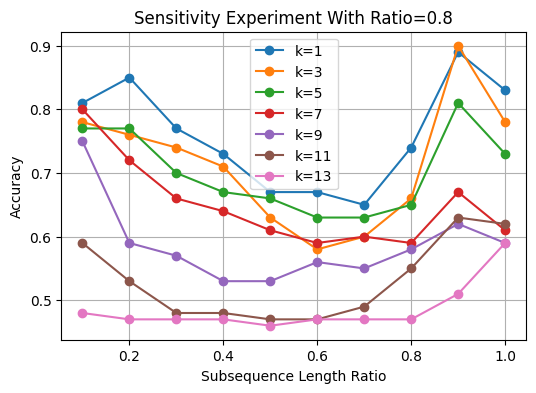

In [52]:
getSensitivityExperimentResultK(value=7)

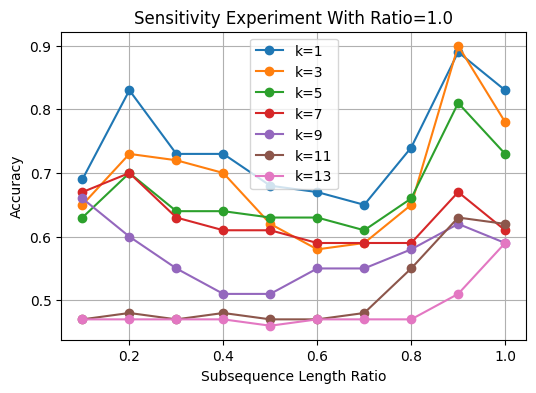

In [53]:
getSensitivityExperimentResultK(value=9)

## 2. Sensitivity with R1

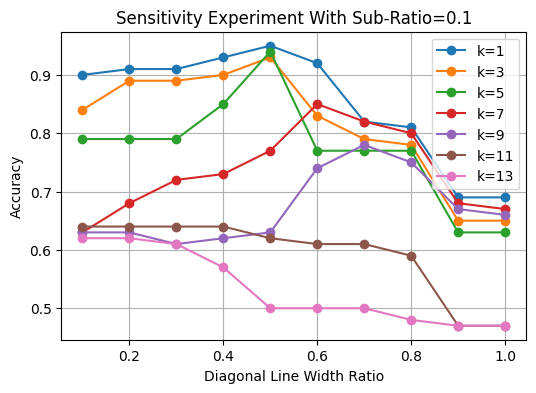

In [54]:
getSensitivityExperimentResultK(ratio=False, value=0)

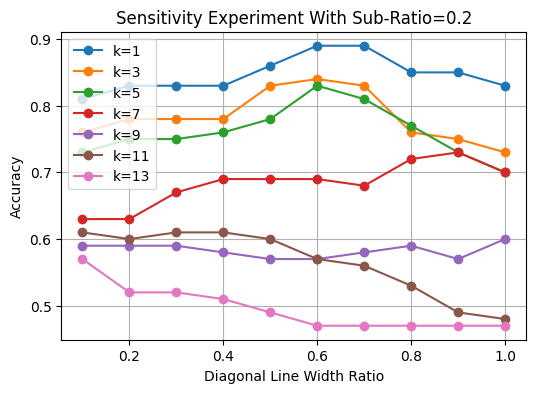

In [55]:
getSensitivityExperimentResultK(ratio=False, value=1)

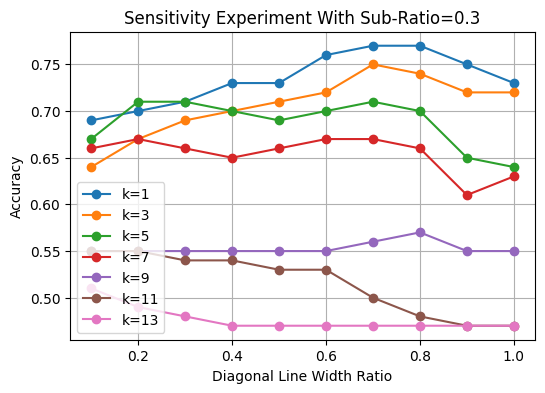

In [56]:
getSensitivityExperimentResultK(ratio=False, value=2)

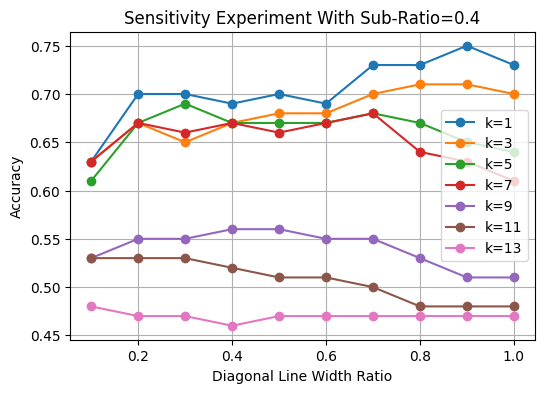

In [57]:
getSensitivityExperimentResultK(ratio=False, value=3)

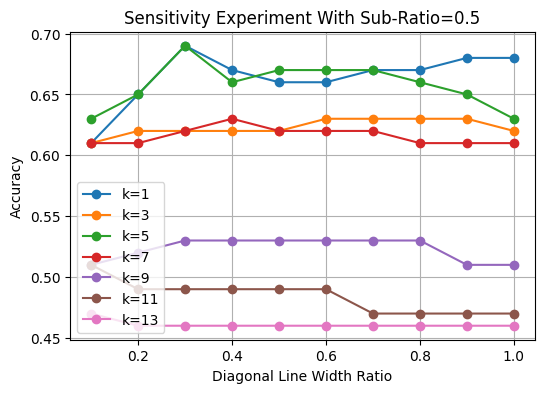

In [58]:
getSensitivityExperimentResultK(ratio=False, value=4)

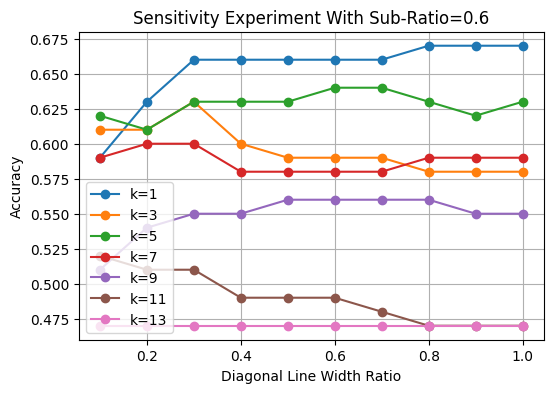

In [59]:
getSensitivityExperimentResultK(ratio=False, value=5)

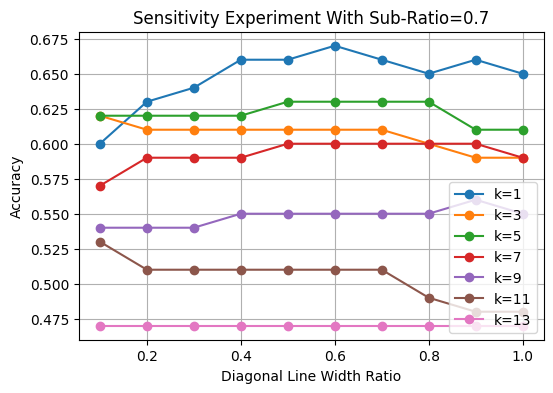

In [60]:
getSensitivityExperimentResultK(ratio=False, value=6)

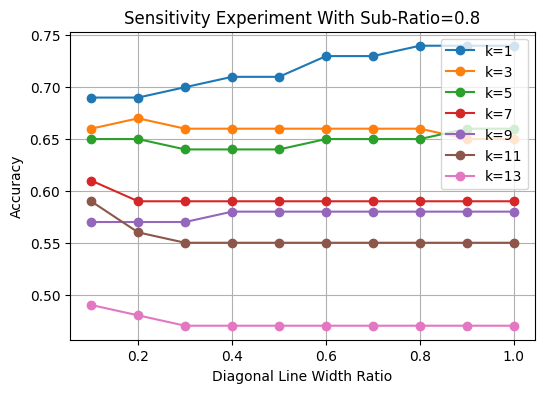

In [61]:
getSensitivityExperimentResultK(ratio=False, value=7)

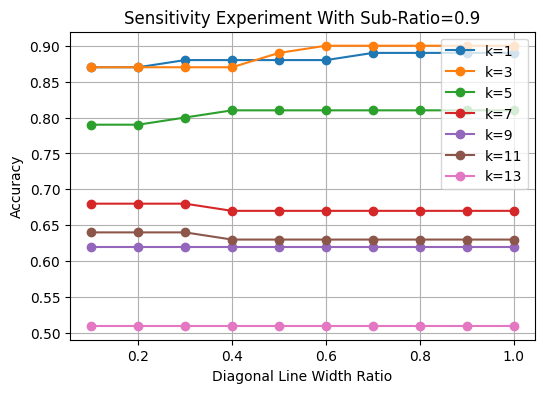

In [62]:
getSensitivityExperimentResultK(ratio=False, value=8)

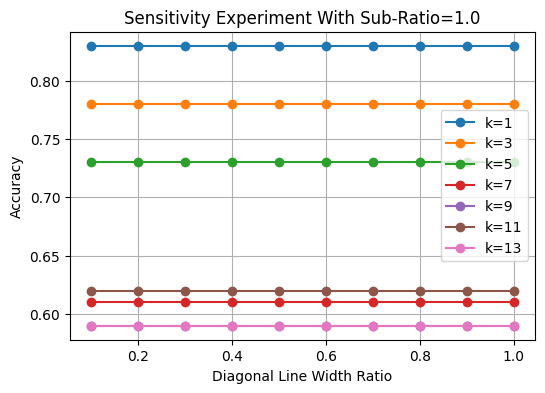

In [63]:
getSensitivityExperimentResultK(ratio=False, value=9)